In [2]:
import math as mt
from scipy.stats import norm 
import pandas as pd
import numpy as np
import matplotlib 
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
df = pd.read_csv('AdSmartABdata.csv')
df.head(5)

,auction_id,experiment,date,hour,device_make,platform_os,browser,yes,no
0,0008ef63-77a7-448b-bd1e-075f42c55e39,exposed,2020-07-10,8,Generic Smartphone,6,Chrome Mobile,0,0
1,000eabc5-17ce-4137-8efe-44734d914446,exposed,2020-07-07,10,Generic Smartphone,6,Chrome Mobile,0,0
2,0016d14a-ae18-4a02-a204-6ba53b52f2ed,exposed,2020-07-05,2,E5823,6,Chrome Mobile WebView,0,1
3,00187412-2932-4542-a8ef-3633901c98d9,control,2020-07-03,15,Samsung SM-A705FN,6,Facebook,0,0
4,001a7785-d3fe-4e11-a344-c8735acacc2c,control,2020-07-03,15,Generic Smartphone,6,Chrome Mobile,0,0


In [ ]:
df.loc[df['experiment'] == 'exposed'].head()

,auction_id,experiment,date,hour,device_make,platform_os,browser,yes,no
0,0008ef63-77a7-448b-bd1e-075f42c55e39,exposed,2020-07-10,8,Generic Smartphone,6,Chrome Mobile,0,0
1,000eabc5-17ce-4137-8efe-44734d914446,exposed,2020-07-07,10,Generic Smartphone,6,Chrome Mobile,0,0
2,0016d14a-ae18-4a02-a204-6ba53b52f2ed,exposed,2020-07-05,2,E5823,6,Chrome Mobile WebView,0,1
8,004940f5-c642-417a-8fd2-c8e5d989f358,exposed,2020-07-04,0,Generic Smartphone,6,Chrome Mobile WebView,0,0
13,006b9c6e-5f5d-4385-a811-ff20a24b30ac,exposed,2020-07-06,8,Samsung SM-G973F,6,Chrome Mobile WebView,0,0


columns names with respective data types

In [ ]:
print("Column Names:")
print("----------------")
for col in df.columns:
    print(col+" ("+str(df[col].dtype)+")")
print("----------------")

Column Names:
----------------
auction_id (object)
experiment (object)
date (object)
hour (int64)
device_make (object)
platform_os (int64)
browser (object)
yes (int64)
no (int64)
----------------


unique values in each column

In [ ]:
df.nunique()

auction_id     8077
experiment        2
date              8
hour             24
device_make     270
platform_os       3
browser          15
yes               2
no                2
dtype: int64

In [ ]:
df.describe(include= 'all')

,auction_id,experiment,date,hour,device_make,platform_os,browser,yes,no
count,8077,8077,8077,8077.000000,8077,8077.000000,8077,8077.000000,8077.000000
unique,8077,2,8,NaN,270,NaN,15,NaN,NaN
top,a568a034-46e7-4bc3-83d8-eaca53f491ba,control,2020-07-03,NaN,Generic Smartphone,NaN,Chrome Mobile,NaN,NaN
freq,1,4071,2015,NaN,4743,NaN,4554,NaN,NaN
mean,NaN,NaN,NaN,11.615080,NaN,5.947134,NaN,0.070818,0.083075
std,NaN,NaN,NaN,5.734879,NaN,0.224333,NaN,0.256537,0.276013
min,NaN,NaN,NaN,0.000000,NaN,5.000000,NaN,0.000000,0.000000
25%,NaN,NaN,NaN,7.000000,NaN,6.000000,NaN,0.000000,0.000000
50%,NaN,NaN,NaN,13.000000,NaN,6.000000,NaN,0.000000,0.000000
75%,NaN,NaN,NaN,15.000000,NaN,6.000000,NaN,0.000000,0.000000


# TASK 1

### AGGREGATION PER DEVICE

In [ ]:
devices = df['device_make'].value_counts().head(10)
devices

Generic Smartphone    4743
iPhone                 433
Samsung SM-G960F       203
Samsung SM-G973F       154
Samsung SM-G950F       148
Samsung SM-G930F       100
Samsung SM-G975F        97
Samsung SM-A202F        88
Samsung SM-A405FN       87
Samsung SM-J330FN       69
Name: device_make, dtype: int64

#### DISTRIBUTION OF THE 10 MOST USED DEVICES

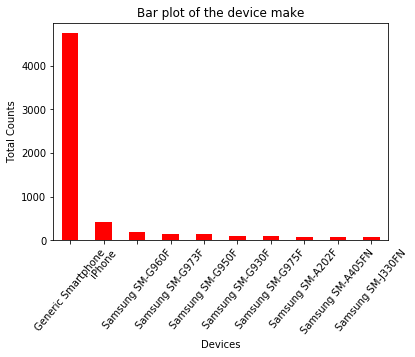

In [ ]:
device_count = df["device_make"].value_counts()[:10]
device_count.plot(kind = "bar", color='red', rot=50)
plt.title("Bar plot of the device make")
plt.ylabel('Total Counts')
plt.xlabel('Devices')
plt.show()

From the bar plot it is evident that Generic Smartphones is mostly used

### AGGREGATION PER PLATFORM OS 

In [ ]:
os = df['platform_os'].value_counts()
os

6    7648
5     428
7       1
Name: platform_os, dtype: int64

Based on the aggregated counts, majority of the users are on platform 6 with a total count of 7648

### AGGREGATION PER BROWSER 

In [ ]:
Browser = df['browser'].value_counts().head(5)
Browser

Chrome Mobile            4554
Chrome Mobile WebView    1489
Samsung Internet          824
Facebook                  764
Mobile Safari             337
Name: browser, dtype: int64

#### DISTRIBUTION OF THE BROWSERS

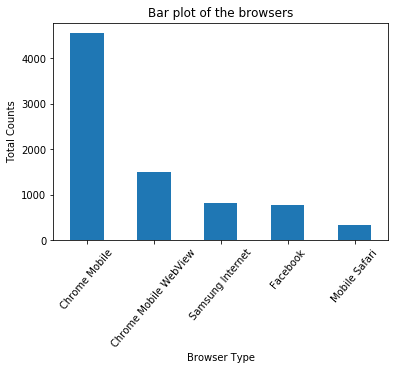

In [ ]:
browsers = df["browser"].value_counts()[:5]
browsers.plot(kind = "bar", rot=50)
plt.title("Bar plot of the browsers")
plt.ylabel('Total Counts')
plt.xlabel('Browser Type')
plt.show()

### AGGREGATION AND VALUE COUNTS OF THE VARIANT GROUPS

In [ ]:
df.groupby('experiment').agg({'yes':np.sum, 'no':np.sum})

,yes,no
experiment,,
control,264,322
exposed,308,349


In [ ]:
df['experiment'].value_counts()

control    4071
exposed    4006
Name: experiment, dtype: int64

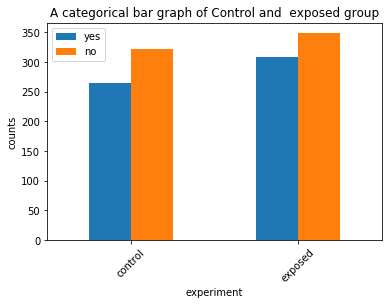

In [ ]:
categ = df.groupby('experiment').agg({'yes':np.sum, 'no':np.sum})

categ.plot(kind= 'bar', rot=45)
plt.title('A categorical bar graph of Control and  exposed group')

plt.ylabel('counts')
plt.show()

In both control and exposed group, there is evidence that more users knew the brand.

## CLASSICAL A/B TESTING

##### Determines the rates in different variant groups 

In [ ]:
control = df[df["experiment"] == "control"]
exposed = df[df["experiment"] == "exposed"]

In [ ]:
control_count, exposed_count = control['yes'].count(), exposed['yes'].count()
clicks_control, clicks_exposed = control['yes'].sum(), exposed['yes'].sum() 
control_click_rate, exposed_click_rate = clicks_control / control_count, clicks_exposed / exposed_count
print("Click rate in control group: {:.3f}".format(control_click_rate))
print("Click rate in exposed group: {:.3f}".format(control_click_rate))

Click rate in control group: 0.065
Click rate in exposed group: 0.065


In [ ]:
std_ctrl = np.sqrt(control_click_rate * (1 - control_click_rate) / control_count)
std_exp = np.sqrt(exposed_click_rate * (1 - exposed_click_rate) / exposed_count)

click_rate = np.linspace(0, 0.2, 200)
control_clicks_prob = norm(control_click_rate, std_ctrl).pdf(click_rate)
exposed_clicks_prob = norm(exposed_click_rate, std_exp).pdf(click_rate)

Creating probability distributions plots

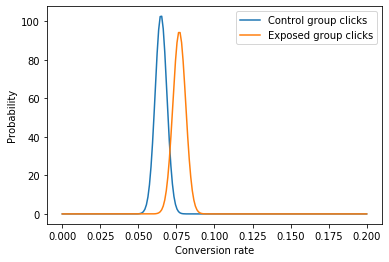

In [ ]:
plt.plot(click_rate, control_clicks_prob, label="Control group clicks")
plt.plot(click_rate, exposed_clicks_prob, label="Exposed group clicks")
plt.legend(frameon=True)
plt.xlabel("Conversion rate"); plt.ylabel("Probability");

plt.show()

zscore is 2.108, with p-value 0.018


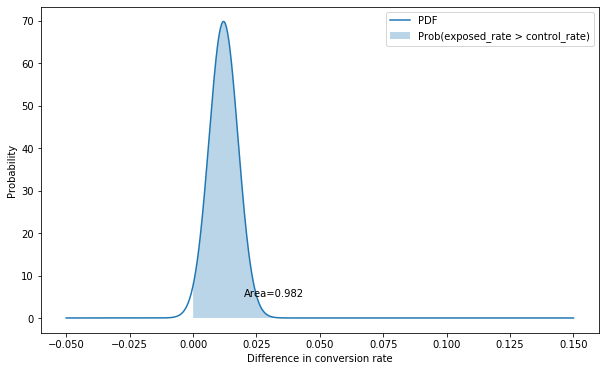

In [ ]:
zscore = (exposed_click_rate - control_click_rate) / np.sqrt(std_ctrl**2 + std_exp**2)
p = norm(exposed_click_rate - control_click_rate, np.sqrt(std_ctrl**2 + std_exp**2))



x = np.linspace(-0.05, 0.15, 1000)
y = p.pdf(x)
area_under_curve = p.sf(0)
plt.figure(figsize=(10,6))
plt.plot(x, y, label="PDF")
plt.fill_between(x, 0, y, where=x>0, label="Prob(exposed_rate > control_rate)", alpha=0.3)
plt.annotate(f"Area={area_under_curve:0.3f}", (0.02, 5))
plt.legend()
plt.xlabel("Difference in conversion rate"); plt.ylabel("Probability")
           

print(f"zscore is {zscore:0.3f}, with p-value {norm().sf(zscore):0.3f}")

## SEQUENTIAL AB TESTING

In [ ]:

def ConditionalSPRT(self,x,y,t1,alpha=0.05,beta=0.10,stop=None):
        if t1<=1:
            printLog('warning',"Odd ratio should exceed 1.")
        if (alpha >0.5) | (beta >0.5):
            printLog('warning',"Unrealistic values of alpha or beta were passed."
                     +" You should have good reason to use large alpha & beta values")
        if stop!=None:
            stop=math.floor(n0)

        def comb(n, k):
            return factorial(n) // factorial(k) // factorial(n - k)
        
        def lchoose(b, j):
            a=[]
            if (type(j) is list) | (isinstance(j,np.ndarray)==True):
                if len(j)<2:
                    j=j[0]
            if (type(j) is list) | (isinstance(j,np.ndarray)==True):
                for k in j:
                    n=b
                    if (0 <= k) & (k<= n):
                        a.append(math.log(comb(n,k)))
                    else:
                        a.append(0)
            else:
                n=b
                k=j
                if (0 <= k) & (k<= n):
                    a.append(math.log(comb(n,k)))
                else:
                    a.append(0)

            return np.array(a)

        def g(x,r,n,t1,t0=1):
            return -math.log(h(x,r,n,t1))+math.log(h(x,r,n,t0))

        def h(x,r,n,t=1):
            return f(r,n,t,offset=ftermlog(x,r,n,t))

        def f(r,n,t,offset=0):
            upper=max(0,r-n)
            lower=min(n,r)
            rng=list(range(upper,lower+1))
            return np.sum(fterm(rng,r,n,t,offset))

        def fterm(j,r,n,t,offset=0):
            ftlog=ftermlog(j,r,n,t,offset)
            return np.array([math.exp(ex) for ex in ftlog])

        def ftermlog(j,r,n,t,offset=0):
            xx=r-j
            lch=lchoose(n,j)
            lchdiff=lchoose(n,xx)
            lg=np.array(j)*math.log(t)
            lgsum=lch+lchdiff
            lgsum2=lgsum+lg
            lgdiff=lgsum2-offset

            return lgdiff

        def logf(r,n,t,offset=0):

            z=f(r,n,t,offset)
            if z>0:
                return math.log(z)
            else:
                return np.nan

        def clowerUpper(r,n,t1c,t0=1,alpha=0.05,beta=0.10):
            offset=ftermlog(math.ceil(r/2),r,n,t1c)
            z=logf(r,n,t1c,logf(r,n,t0,offset)+offset)
            a=-math.log(alpha/(1-beta))
            b=math.log(beta/(1-alpha))
            lower=b
            upper=1+a
            return (np.array([lower,upper])+z)/math.log(t1c/t0)
            
        l=math.log(beta/(1-alpha))
        u=-math.log(alpha/(1-beta))
        sample_size=min(len(x),len(y))
        n=np.array(range(1,sample_size+1))

        if stop!=None:
            n=np.array([z for z in n if z<=stop])
        x1=np.cumsum(x[n-1])
        r=x1+np.cumsum(y[n-1])
        stats=np.array(list(map(g,x1, r, n, [t1]*len(x1)))) #recurcively calls g

        clu=list(map(clowerUpper,r,n,[t1]*len(r),[1]*len(r),[alpha]*len(r), [beta]*len(r)))
        limits=[]
        for v in clu:
            inArray=[]
            for vin in v:
                inArray.append(math.floor(vin))
            limits.append(np.array(inArray))
        limits=np.array(limits)

        k=np.where((stats>=u) | (stats<=l))
        cvalues=stats[k]
        if cvalues.shape[0]<1:
            k= np.nan
            outcome='Unable to conclude.Needs more sample.'
        else:
            k=np.min(k)
            if stats[k]>=u:
                outcome=f'Exposed group produced a statistically significant increase.'
            else:
                outcome='Their is no statistically significant difference between two test groups'
        if (stop!=None) & (k==np.nan):
            c1=clowerUpper(r,stop,t1,alpha,beta)
            c1=math.floor(np.mean(c1)-0.5)
            if x1[n0]<=c1:
                truncate_decision='h0'
                outcome='Maximum Limit Decision. The aproximate decision point shows their is no statistically significant difference between two test groups'
            else:
                truncate_decision='h1'
                outcome=f'Maximum Limit Decision. The aproximate decision point shows exposed group produced a statistically significant increase.'
            truncated=stop
        else:
            truncate_decision='Non'
            truncated=np.nan
        return (outcome,n, k,l,u,truncated,truncate_decision,x1,r,stats,limits)

# TASK 2: MACHINE LEARNING

#### DECISION TREE

In [1]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import preprocessing
from statistics import *
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [4]:
path = "/content/drive/My Drive/10Acad/AdSmartABdata.csv"
df = pd.read_csv(path)

In [5]:
conditions = [
              (df['yes'] == 1) & (df['no'] == 0),
              (df['yes'] == 0) & (df['no'] == 1),
              (df['yes'] == 0) & (df['no'] == 0)
]

values = [1,0,2]
df['target_values'] = np.select(conditions, values)
df.tail()

,auction_id,experiment,date,hour,device_make,platform_os,browser,yes,no,target_values
8072,ffea24ec-cec1-43fb-b1d1-8f93828c2be2,exposed,2020-07-05,7,Generic Smartphone,6,Chrome Mobile,0,0,2
8073,ffea3210-2c3e-426f-a77d-0aa72e73b20f,control,2020-07-03,15,Generic Smartphone,6,Chrome Mobile,0,0,2
8074,ffeaa0f1-1d72-4ba9-afb4-314b3b00a7c7,control,2020-07-04,9,Generic Smartphone,6,Chrome Mobile,0,0,2
8075,ffeeed62-3f7c-4a6e-8ba7-95d303d40969,exposed,2020-07-05,15,Samsung SM-A515F,6,Samsung Internet,0,0,2
8076,fffbb9ff-568a-41a5-a0c3-6866592f80d8,control,2020-07-10,14,Samsung SM-G960F,6,Facebook,0,0,2


In [15]:
# Initialize label encoder
label_encoder = preprocessing.LabelEncoder()

# Convert variables to numeric
encoded_experiment = label_encoder.fit_transform(df["experiment"])
encoded_device_make = label_encoder.fit_transform(df["device_make"])
encoded_browser = label_encoder.fit_transform(df["browser"])
encoded_date = label_encoder.fit_transform(df["date"])

In [16]:
X = pd.DataFrame([encoded_experiment,
                  encoded_device_make,
                  encoded_browser,
                  encoded_date,
                  df['hour'],
                  df['platform_os']]).T
y = df['target_values']

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [18]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [19]:
y_pred = model.predict(X_test)

In [ ]:
preds=pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})
preds

,Actual,Predicted
5988,1,2
7490,2,2
1811,2,2
3121,2,2
4459,2,2
...,...,...
5492,1,2
993,2,2
1570,2,2
286,2,2


Comparing predictions against the test values

In [21]:
def plot_preds(y_test, y_preds, model_name):
    N = len(y_test)
    plt.figure(figsize=(10,5))
    original = plt.scatter(np.arange(1, N+1), y_test, c='red')
    prediction = plt.scatter(np.arange(1, N+1), y_preds, c='purple')
    plt.xticks(np.arange(1, N+1))
    plt.xlabel('Oberservation')
    plt.ylabel('Conversion')
    title = 'Original values vs. Predicted values ({})'.format(model_name)
    plt.title(title)
    plt.legend((original, prediction), ('Original', 'Prediction'))
    plt.show()

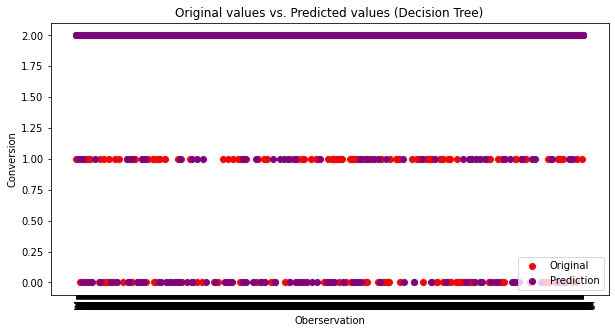

In [22]:
plot_preds(y_test, y_pred, "Decision Tree")

In [ ]:
kf = KFold(n_splits=5, shuffle=True, random_state=1)
model = DecisionTreeClassifier()

scores = cross_val_score(model, X, y, scoring='accuracy', cv=kf)
print(scores)
print('KFold CrossValScore Using Decision Tree: ', scores.mean())

[0.77970297 0.76608911 0.78885449 0.7752322  0.78266254]
KFold CrossValScore Using Decision Tree:  0.7785082610428226


Decision Tree Classifier feature Importance

In [ ]:
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))

Feature: 0, Score: 0.03848
Feature: 1, Score: 0.38651
Feature: 2, Score: 0.04700
Feature: 3, Score: 0.19700
Feature: 4, Score: 0.33056
Feature: 5, Score: 0.00046


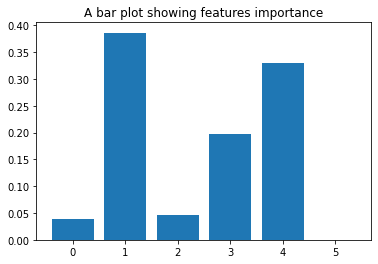

In [ ]:
# plot feature importance
plt.title('A bar plot showing features importance')
plt.bar([x for x in range(len(importance))], importance)
plt.show()

##### LOGISTIC REGRESSION

###### logistic regression using train and test split only

In [ ]:
df.shape

(8077, 10)

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

X = pd.DataFrame([encoded_experiment,
                  encoded_device_make,
                  encoded_browser,
                  encoded_date,
                  df['hour'],
                  df['platform_os']]).T
y = df['target_values']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Initialize logistic regression model
model = LogisticRegression(solver='lbfgs', max_iter=4000)
model.fit(X_train, y_train)

result = model.score(X_test, y_test)
print("Accuracy: %.2f%%" % (result*100.0))

Accuracy: 83.54%


###### logistic regression using k-fold cross validation

In [24]:
from sklearn import model_selection
from sklearn.model_selection import KFold

kfold = model_selection.KFold(n_splits=5)
model_kfold = LogisticRegression(solver='lbfgs', max_iter=4000)
results_kfold = model_selection.cross_val_score(model_kfold, X, y, cv=kfold)
print("Accuracy: %.2f%%" % (results_kfold.mean()*100.0)) 

Accuracy: 84.61%


In [25]:
kf = KFold(n_splits=5,shuffle=False)
kf.split(X)  
mdl = LogisticRegression(solver='lbfgs', max_iter=4000)

for train_index, test_index in kf.split(X):
    # Split train-test
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y[train_index], y[test_index]
    # Train the model
    model = mdl.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)
pd.crosstab(y_pred,y_test)

target_values,0,1,2
row_0,,,
2,139,124,1352


In [ ]:
# Generate table of predictions vs actual
preds=pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})
preds

,Actual,Predicted
6462,2,2
6463,2,2
6464,2,2
6465,2,2
6466,2,2
...,...,...
8072,2,2
8073,2,2
8074,2,2
8075,2,2


comparing predicted values from regression against test values

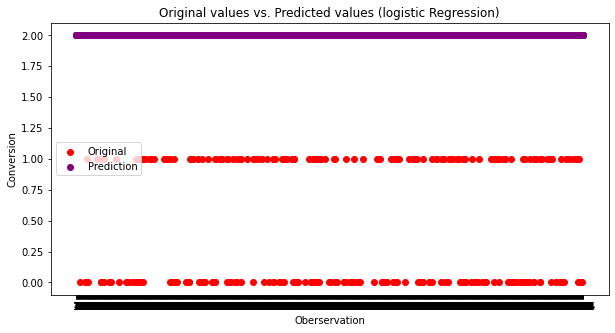

In [26]:
plot_preds(y_test, y_pred, "logistic Regression")

FEATURE IMPORTANCE

In [ ]:
# get importance
importance = model.coef_[0]
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))

Feature: 0, Score: -0.04022
Feature: 1, Score: -0.00045
Feature: 2, Score: 0.01949
Feature: 3, Score: -0.00294
Feature: 4, Score: -0.01071
Feature: 5, Score: 0.40090


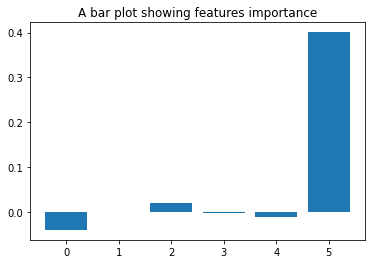

In [ ]:
# plot feature importance
plt.title('A bar plot showing features importance')
plt.bar([x for x in range(len(importance))], importance)
plt.show()

###### k-fold cross validation using XGBoost

In [ ]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error

In [ ]:
X = pd.DataFrame([encoded_experiment,
                  encoded_device_make,
                  encoded_browser,
                  encoded_date,
                  df['hour'],
                  df['platform_os']]).T
y = df['target_values']


kf = KFold(n_splits=5,shuffle=False)
kf.split(X)  


for train_index, test_index in kf.split(X):
    # Split train-test
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y[train_index], y[test_index]

#XGBoost Implementation
#converting dataset into an optimized data structure
dtrain = xgb.DMatrix(X_train, label=y_train)
dvalid = xgb.DMatrix(X_test, label=y_test)

watchlist = [(dtrain, 'train'), (dvalid, 'valid')]

#kfolds
params = {"objective":"reg:linear", 'eval_metric': 'rmse', 'colsample_bytree': 0.3,'learning_rate': 0.1,
                'max_depth': 5, 'alpha': 10}

model = xgb.train(params, dtrain, 500, watchlist, early_stopping_rounds=250,
                  maximize=False, verbose_eval=15)

[00:59:59] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	train-rmse:1.28163	valid-rmse:1.27434
Multiple eval metrics have been passed: 'valid-rmse' will be used for early stopping.

Will train until valid-rmse hasn't improved in 250 rounds.
[15]	train-rmse:0.631863	valid-rmse:0.638504
[30]	train-rmse:0.58741	valid-rmse:0.599237
[45]	train-rmse:0.584763	valid-rmse:0.597778
[60]	train-rmse:0.584194	valid-rmse:0.597718
[75]	train-rmse:0.583974	valid-rmse:0.597697
[90]	train-rmse:0.583817	valid-rmse:0.597496
[105]	train-rmse:0.583707	valid-rmse:0.597424
[120]	train-rmse:0.58361	valid-rmse:0.597343
[135]	train-rmse:0.583518	valid-rmse:0.597245
[150]	train-rmse:0.583425	valid-rmse:0.597154
[165]	train-rmse:0.583382	valid-rmse:0.597105
[180]	train-rmse:0.583331	valid-rmse:0.597064
[195]	train-rmse:0.583279	valid-rmse:0.597026
[210]	train-rmse:0.583234	valid-rmse:0.596949
[225]	train-rmse:0.58321	valid-rmse:0.596908
[240

final boosting round metric

In [ ]:
ytest = model.predict(dtest)

49    0.588296
Name: test-rmse-mean, dtype: float64
